In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data

In [2]:
# Imports data from Github (Rami Krispin) - dataset is compiled from John Hopkins University
data = pd.read_csv('https://raw.githubusercontent.com/RamiKrispin/coronavirus/master/csv/coronavirus.csv')

In [3]:
data['date'] = pd.to_datetime(data['date'], dayfirst=True)

In [4]:
print('There are currently', len(data['country'].unique()), 'countries in this dataset')
print('This dataset ranges from', data.date.min(), 'to', data.date.max())
print('It gives the numbers of people who have confirmed coronavirus, have died, or have recovered')

There are currently 188 countries in this dataset
This dataset ranges from 2020-01-22 00:00:00 to 2020-07-18 00:00:00
It gives the numbers of people who have confirmed coronavirus, have died, or have recovered


In [5]:
del data['lat']
del data['long']

## Initial analysis

The full dataset contains data for all countries affected by Covid-19. The dissertation, however, solely focuses on Italy (currently)

In [6]:
# A function that gets data for a specific country
# Ensures that the start date is the date of the first confirmed case
def country_dataset(data, country):
    cdata = data[(data['country']==country)&(data.type=='confirmed')]
    start_date = cdata[cdata.cases>0]['date'].min()
    
    cdata = data[(data['country']==country)&(data.date>=start_date)]
    cdata = cdata.groupby(['date', 'type']).sum()
    cdata.reset_index(inplace=True)

    data = cdata[cdata.type == 'confirmed'].groupby('date').sum()
    data.reset_index(inplace=True)
    data.columns = ['date','confirmed']
    dr = cdata[cdata.type != 'confirmed']
    data['removed'] = dr.groupby('date').sum().cases.values
    r = cdata[cdata.type == 'recovered']
    data['recovered'] = r.groupby('date').sum().cases.values
    d = cdata[cdata.type == 'death']
    data['death'] = d.groupby('date').sum().cases.values

    # Need to use cumulative sum instead of daily cases
    data['sumconfirmed'] = data.confirmed.cumsum()
    data['sumremoved'] = data.removed.cumsum()
    data['sumrecovered'] = data.recovered.cumsum()
    data['sumdeath'] = data.death.cumsum()

    data['suminfected'] = np.array(data.sumconfirmed) - np.array(data.sumremoved)
    data.sumconfirmed[data.sumconfirmed<0] = 0
    data.suminfected[data.suminfected<0] = 0

    return data

### United Kingdom

C:\Users\Rose Pegler\anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Rose Pegler\anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


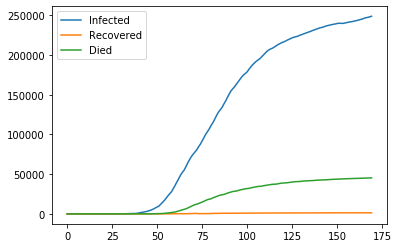

In [11]:
# UK has not reported recovered cases which skews the data
ukdata = country_dataset(data, 'United Kingdom')
ukdata.suminfected.plot(label='Infected')
ukdata.sumrecovered.plot(label='Recovered')
ukdata.sumdeath.plot(label='Died')
plt.legend()

### Italy

C:\Users\Rose Pegler\anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Rose Pegler\anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


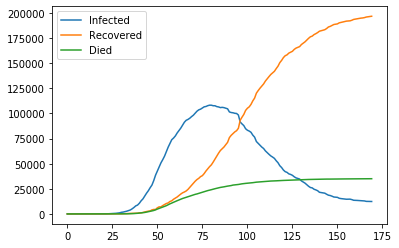

In [12]:
italy = country_dataset(data, 'Italy')
italy.suminfected.plot(label='Infected')
italy.sumrecovered.plot(label='Recovered')
italy.sumdeath.plot(label='Died')
plt.legend()

# Transfer Italy data to its own csv file
italy.to_csv('italycovid19.csv')

## China

C:\Users\Rose Pegler\anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Rose Pegler\anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


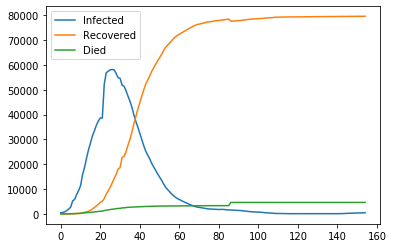

In [12]:
china = country_dataset(data, 'China')
china.suminfected.plot(label='Infected')
china.sumrecovered.plot(label='Recovered')
china.sumdeath.plot(label='Died')
plt.legend()